In [23]:
import numpy as np
import pandas as pd

In [24]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00265/CASP.csv',na_values="?")
print(df.isna().sum())

RMSD    0
F1      0
F2      0
F3      0
F4      0
F5      0
F6      0
F7      0
F8      0
F9      0
dtype: int64


In [25]:
df.head()

RMSD        F1       F2       F3        F4            F5        F6  \
0  17.284  13558.30  4305.35  0.31754  162.1730  1.872791e+06  215.3590   
1   6.021   6191.96  1623.16  0.26213   53.3894  8.034467e+05   87.2024   
2   9.275   7725.98  1726.28  0.22343   67.2887  1.075648e+06   81.7913   
3  15.851   8424.58  2368.25  0.28111   67.8325  1.210472e+06  109.4390   
4   7.962   7460.84  1736.94  0.23280   52.4123  1.021020e+06   94.5234   

        F7   F8       F9  
0  4287.87  102  27.0302  
1  3328.91   39  38.5468  
2  2981.04   29  38.8119  
3  3248.22   70  39.0651  
4  2814.42   41  39.9147

In [26]:
from sklearn.impute import SimpleImputer
df = pd.DataFrame(SimpleImputer(strategy ="mean").fit_transform(df))
df

0         1        2        3         4             5         6  \
0      17.284  13558.30  4305.35  0.31754  162.1730  1.872791e+06  215.3590   
1       6.021   6191.96  1623.16  0.26213   53.3894  8.034467e+05   87.2024   
2       9.275   7725.98  1726.28  0.22343   67.2887  1.075648e+06   81.7913   
3      15.851   8424.58  2368.25  0.28111   67.8325  1.210472e+06  109.4390   
4       7.962   7460.84  1736.94  0.23280   52.4123  1.021020e+06   94.5234   
...       ...       ...      ...      ...       ...           ...       ...   
45725   3.762   8037.12  2777.68  0.34560   64.3390  1.105797e+06  112.7460   
45726   6.521   7978.76  2508.57  0.31440   75.8654  1.116725e+06  102.2770   
45727  10.356   7726.65  2489.58  0.32220   70.9903  1.076560e+06  103.6780   
45728   9.791   8878.93  3055.78  0.34416   94.0314  1.242266e+06  115.1950   
45729  18.827  12732.40  4444.36  0.34905  157.6300  1.788897e+06  229.4590   

             7      8        9  
0      4287.87  102.0  27.0302  
1      3328.91   39.0  38.5468  
2      2981.04   29.0  38.8119  
3      3248.22   70.0  39.0651  
4      2814.42   41.0  39.9147  
...        ...    ...      ...  
45725  3384.21   84.0  36.8036  
45726  3974.52   54.0  36.0470  
45727  3290.46   46.0  37.4718  
45728  3421.79   41.0  35.6045  
45729  4626.85  141.0  29.8118  

[45730 rows x 10 columns]

In [27]:
from sklearn.preprocessing import LabelEncoder
columns=[0,1,2,3,4,5,6,7,8,9]
for i in columns:
    df[i]=LabelEncoder().fit_transform(df[i])
print(df.head())

       0      1      2      3      4      5      6      7    8      9
0  13510  32656  32484  11279  33883  34050  32181  25764  102   5074
1   5132   6823   5657   6180   5635   5264   7680  12391   39  27423
2   7216  14317   6801   2973  12478  14830   6144   7367   29  28086
3  12338  18012  15441   7919  12807  19891  15003  11196   70  28804
4   6401  12952   6919   3650   5229  12817  10169   5994   41  30760


In [28]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,ytrain,ytest=train_test_split(X,y,test_size=0.3)
print(x_train.shape,x_test.shape,ytrain.shape,ytest.shape)

(32011, 9) (13719, 9) (32011,) (13719,)


# LINEAR REGRESSION

In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
model = LinearRegression()
model.fit(x_train, ytrain)
y_pred = model.predict(x_test)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 12310767.27789174
R2 Score: 0.8924578629549954


# POLYNOMIAL REGRESSION

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [33]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
model = LinearRegression()
model.fit(x_train_poly, ytrain)
y_pred = model.predict(x_test_poly)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 11365951.808770796
R2 Score: 0.9007114081946098


# DECISION TREE REGRESSOR

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, ytrain)
y_pred = model.predict(x_test)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 18575776.334759366
R2 Score: 0.8377291488648664


# RANSAC REGRESSOR

In [36]:
from sklearn.linear_model import RANSACRegressor

In [37]:
model = RANSACRegressor(random_state=42)
model.fit(x_train, ytrain)
y_pred = model.predict(x_test)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 12969248.18166125
R2 Score: 0.8867056265593102


# CORRELATION MATRIX

In [38]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00265/CASP.csv')
columns = ['RMSD','F1', 'F2', 'F3', 'F4', 'F5','F6','F7','F8','F9']
data = data[columns]
corr_matrix = data.corr()
print(corr_matrix)

          RMSD        F1        F2        F3        F4        F5        F6  \
RMSD  1.000000 -0.015087  0.156895  0.374309 -0.169771 -0.013982 -0.036135   
F1   -0.015087  1.000000  0.906606  0.126285  0.931056  0.998185  0.967531   
F2    0.156895  0.906606  1.000000  0.502562  0.793143  0.902853  0.908354   
F3    0.374309  0.126285  0.502562  1.000000  0.031230  0.122622  0.200650   
F4   -0.169771  0.931056  0.793143  0.031230  1.000000  0.925707  0.938108   
F5   -0.013982  0.998185  0.902853  0.122622  0.925707  1.000000  0.961769   
F6   -0.036135  0.967531  0.908354  0.200650  0.938108  0.961769  1.000000   
F7   -0.003339  0.554002  0.515929  0.080064  0.485185  0.553729  0.538198   
F8    0.000344  0.651251  0.584242  0.095340  0.676919  0.642961  0.662584   
F9    0.062830 -0.898240 -0.786188 -0.069039 -0.891766 -0.897765 -0.881973   

            F7        F8        F9  
RMSD -0.003339  0.000344  0.062830  
F1    0.554002  0.651251 -0.898240  
F2    0.515929  0.584242 -0.78

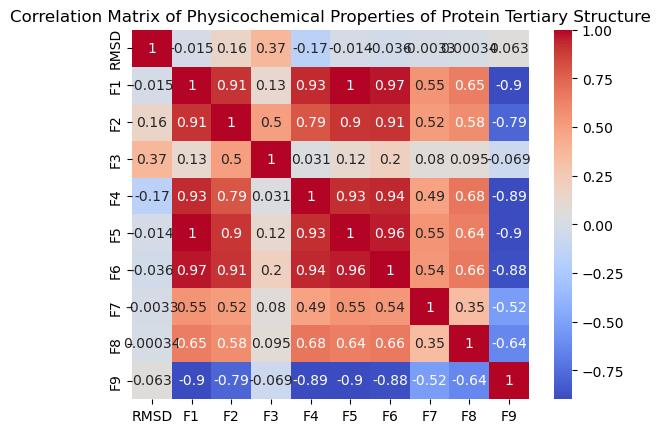

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00265/CASP.csv')
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix of Physicochemical Properties of Protein Tertiary Structure')
plt.show()

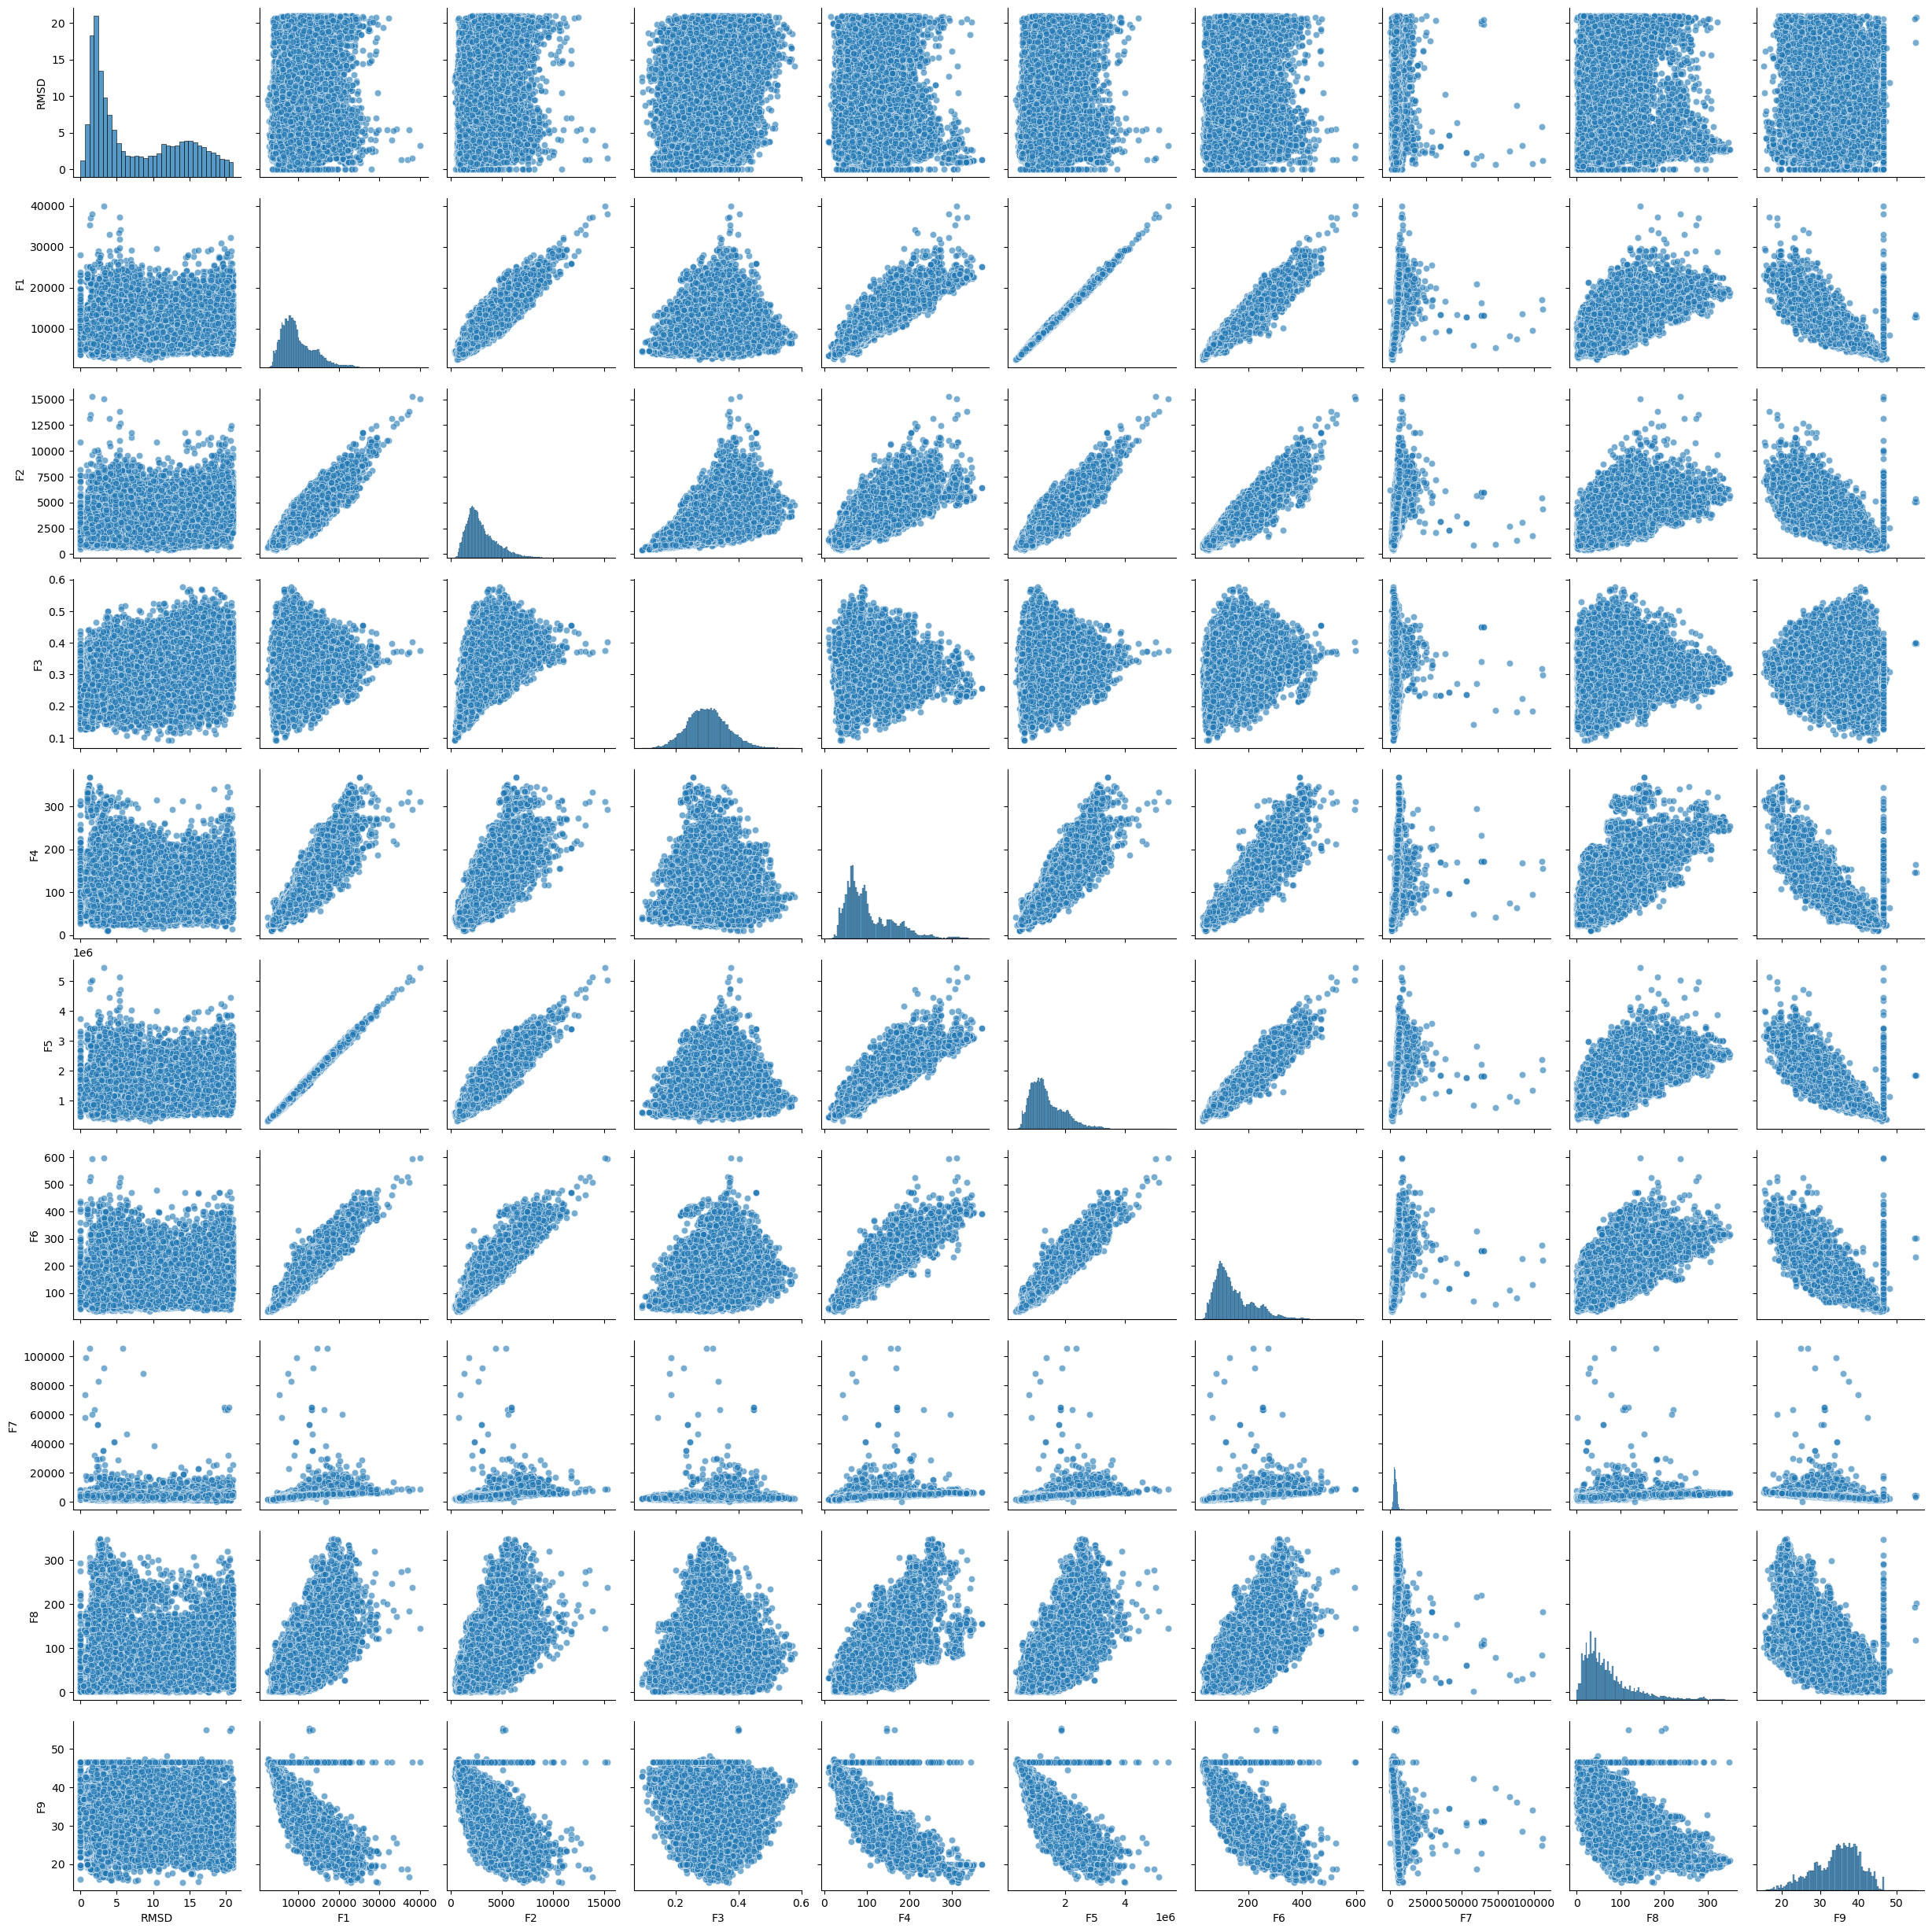

In [41]:
import seaborn as sns
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00265/CASP.csv')
cols = ['RMSD','F1', 'F2', 'F3', 'F4', 'F5','F6','F7','F8','F9']
sns.pairplot(df[cols], diag_kind='hist', plot_kws={'alpha': 0.6})

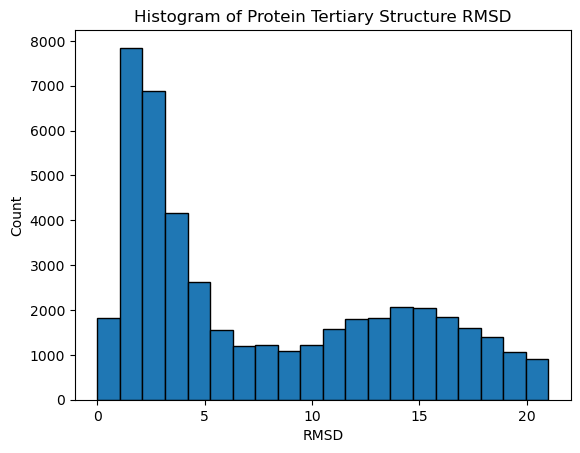

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from a CSV file
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00265/CASP.csv')

# Extract the property we're interested in
property_name = 'RMSD'
values = data[property_name]

# Plot a histogram of the values
plt.hist(values, bins=20, edgecolor='black')
plt.xlabel(property_name)
plt.ylabel('Count')
plt.title('Histogram of Protein Tertiary Structure ' + property_name)
plt.show()